
# <font color='blue'> **Powerpuff  Girls Team**</font>

# Business Goal

*To determine which season is the best to add new datas in datas sharing service.

# Business Problem
* Bikes will be added if the number of users is expected to increase by 20% every season.

# Math Problem
* To predict the number of users for next year's seasons.

# Math Model
* Regression model

# Scenario of Model Usage
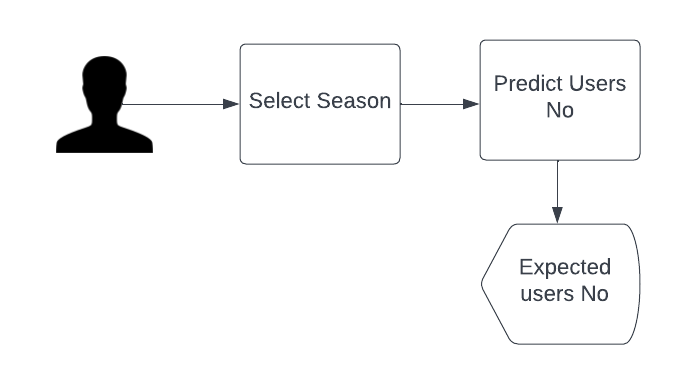

* The employee selects the season from the system to find out the expected number of users
* By clicking a predict button, the employee gets the expected number
* Compare the number with the previous season's users and the number of bikes available
* Based on the findings, the employee may decide to purchase more bikes this season

# Validation process (find an optimal model with the best performance)
* Split dataset (test, validation, training)
* K-Fold Cross-Validation
* Bootstrapping
* Random Subsampling

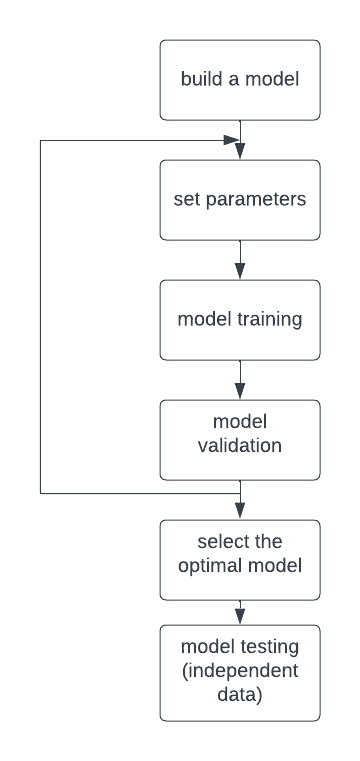


# Potential economic effect
* Cost: The cost of each bike
* Bike: Number of bikes will be added
* User: Number of users(expected to increase)
* Price: Price of renting each bike
* Month: Number of months

<font color='blue'>(revenue  - Expenses) * Month</font>

<font color='blue'>((User * Price) - (Cost * Bike)) * Month</font>


How our assumption can be effected? 
( ++ increase , -- decrese )

*Increasinh the price or got more customer, revenue + +

*Decreasing the number of new bikes or its cost, revenue ++

If we want to get new bikes, we might increase the price for each user.

what is the number of bike we need, without having the need to rise the price, and without high cost?


how to know the number of bikes?

depending on the historical data

From our model we can get this: 

(the expected number of users - number of users in the previous season/number of users in the previous season ) *100

Which give us the number of new users. 

# Preliminary Data Analysis

## Imports 

In [3]:
!pip install mlflow --quiet
!pip install pyngrok --quiet

     |████████████████████████████████| 17.9 MB 1.2 MB/s 
     |████████████████████████████████| 181 kB 45.2 MB/s 
     |████████████████████████████████| 209 kB 49.6 MB/s 
     |████████████████████████████████| 596 kB 52.7 MB/s 
     |████████████████████████████████| 146 kB 49.2 MB/s 
     |████████████████████████████████| 81 kB 7.3 MB/s 
     |████████████████████████████████| 79 kB 7.0 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 78 kB 5.8 MB/s 
     |████████████████████████████████| 745 kB 5.1 MB/s 


In [4]:
from IPython.display import Image

import datetime
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics, model_selection, ensemble

import plotly.figure_factory as ff
import plotly.offline as py
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

import mlflow
import xgboost as xgb
import mlflow.sklearn
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

import warnings
warnings.filterwarnings('ignore')
py.init_notebook_mode(connected=True)

In [397]:
matplotlib.pyplot.style.use('ggplot')
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/hour_v2.csv')

In [400]:
data.shape

(17379, 20)

In [401]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'casual_cost', 'registered', 'registered_cost', 'cnt',
       'total_rev'],
      dtype='object')

In [402]:
data.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,casual_cost,registered,registered_cost,cnt,total_rev
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,45,13,130,16,175
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,120,32,320,40,440
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,75,27,270,32,345
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,45,10,100,13,145
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,0,1,10,1,10


In [403]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,casual_cost,registered,registered_cost,cnt,total_rev
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,535.143276,153.786869,1537.868692,189.463088,2073.011968
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,739.575456,151.357286,1513.572859,181.387599,1993.010717
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,60.000000,34.000000,340.000000,40.000000,427.500000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,255.000000,115.000000,1150.000000,142.000000,1540.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,720.000000,220.000000,2200.000000,281.000000,3090.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,5505.000000,886.000000,8860.000000,977.000000,10890.000000


In [404]:
data.isnull().sum()

instant            0
dteday             0
season             0
yr                 0
mnth               0
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         0
temp               0
atemp              0
hum                0
windspeed          0
casual             0
casual_cost        0
registered         0
registered_cost    0
cnt                0
total_rev          0
dtype: int64

In [405]:
data.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

## Rents Per Season

In [406]:
sea = ['Winter','Spring','Summer','Fall']
fig = px.bar(data, x= sea, y = data.season.value_counts(), labels='seasons',title= 'Rents Per Season')
fig.update_xaxes(title_text="Seasons")
fig.update_yaxes(title_text="Number of Rents")
fig.show(renderer="colab")

## Rents Per Month

In [407]:
x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig = px.bar(data, x= x, y = data.mnth.value_counts(), labels='seasons',title= 'Rents Per Month')
fig.update_xaxes(title_text="Months")
fig.update_yaxes(title_text="Number of Rents")
fig.show(renderer="colab")

In [408]:
data.holiday.value_counts()

0    16879
1      500
Name: holiday, dtype: int64

## Rents During Holidays

In [409]:
dt = data.holiday.value_counts()
ds = ['No', 'Yes']
fig = px.pie(data, values = dt,title= 'Rents During Holidays', names=ds)
fig.update_xaxes(title_text="Months")
fig.update_yaxes(title_text="Number of Rents")
fig.show(renderer="colab")

## Rents During Working Days

In [410]:
dt = data.workingday.value_counts()
ds = ['Yes', 'No']
fig = px.pie(data, values = dt,title= 'Rents During Working Days', names=ds)
fig.update_xaxes(title_text="Months")
fig.update_yaxes(title_text="Number of Rents")
fig.show(renderer="colab")

## Rents Per Week Days

In [411]:
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
fig = px.bar(data, x= week, y = data.weekday.value_counts(), labels='Week Days',title= 'Rents Per Week Days')
fig.update_xaxes(title_text="Days")
fig.update_yaxes(title_text="Number of Rents")
fig.show(renderer="colab")

## Relationship between Temperature and Users

[Text(0.5, 1.0, 'Relation between humidity and users')]

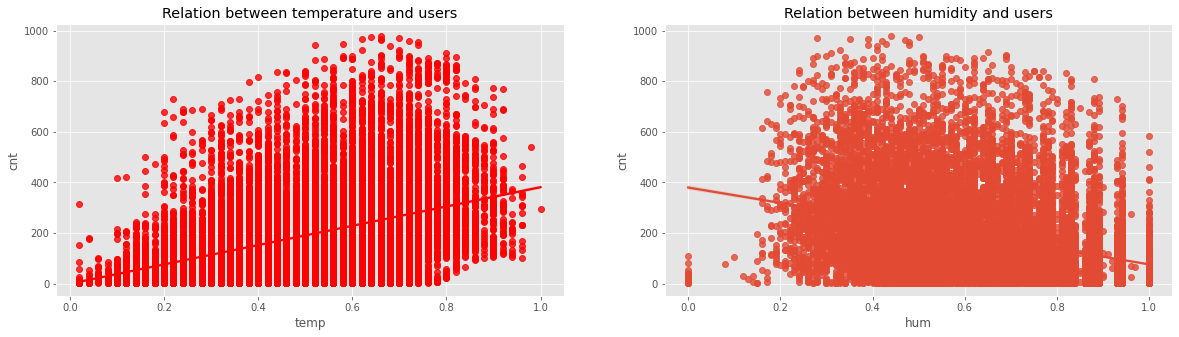

In [412]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.regplot(x=data['temp'], y=data['cnt'], ax=ax1 ,color='red')
ax1.set(title="Relation between temperature and users")
sns.regplot(x=data['hum'], y=data['cnt'], ax=ax2)
ax2.set(title="Relation between humidity and users")

## Rents Per Hour

In [413]:
dt = data.hr.value_counts()
ds = data.hr.unique()
fig = px.pie(data, values = dt,title= 'Rents Per Hour', names=ds)
fig.update_xaxes(title_text="Hours")
fig.update_yaxes(title_text="Number of Rents")
fig.show(renderer="colab")

In [414]:
data.tail(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,casual_cost,registered,registered_cost,cnt,total_rev
17369,17370,2012-12-31,1,1,12,14,0,1,1,2,0.28,0.2727,0.45,0.2239,62,930,185,1850,247,2780
17370,17371,2012-12-31,1,1,12,15,0,1,1,2,0.28,0.2879,0.45,0.1343,69,1035,246,2460,315,3495
17371,17372,2012-12-31,1,1,12,16,0,1,1,2,0.26,0.2576,0.48,0.1940,30,450,184,1840,214,2290
17372,17373,2012-12-31,1,1,12,17,0,1,1,2,0.26,0.2879,0.48,0.0896,14,210,150,1500,164,1710
17373,17374,2012-12-31,1,1,12,18,0,1,1,2,0.26,0.2727,0.48,0.1343,10,150,112,1120,122,1270
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,165,108,1080,119,1245
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,120,81,810,89,930
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,105,83,830,90,935
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,195,48,480,61,675
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,180,37,370,49,550


In [415]:
x = data.temp
temp_store = []
for i in x:
  a = 47 * i - 8
  temp_store.append(round(a))

In [416]:
temp_store = zip(temp_store, data.cnt)

In [417]:
temp_stored = list(temp_store)

In [418]:
df = pd.DataFrame.from_dict(temp_stored)
df.columns = ['temp', 'value']

In [419]:
fig = px.line(df, y= df.temp.unique(), x = df.temp.value_counts(), labels='Temperature',title= 'Rents Per Temperature')
fig.update_xaxes(title_text="Number of Rents")
fig.update_yaxes(title_text="Temperature")

fig.show(renderer="colab")

In [420]:
dt = ['Clear','Cloudy','Light Snow','Heavy Rain']
fig = px.bar(data, x= dt, y = data.weathersit.value_counts(), labels='Weather',title= 'Rents Per Weather Conditions')
fig.update_xaxes(title_text="Weather")
fig.update_yaxes(title_text="Number of Rents")
fig.show(renderer="colab")

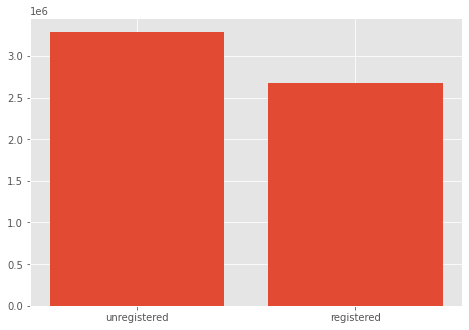

In [421]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cnt = [data.cnt.sum(), data.registered.sum()]
lable = ['unregistered', 'registered']
ax.bar(lable,cnt)
plt.show()

## Correlation Analysis

In [422]:
data.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,casual_cost,registered,registered_cost,cnt,total_rev
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.158295,0.282046,0.282046,0.278379,0.272938
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.120206,0.174226,0.174226,0.178056,0.176921
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.142779,0.253684,0.253684,0.250495,0.245641
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.068457,0.122273,0.122273,0.120638,0.118262
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.301202,0.374141,0.374141,0.394071,0.395909
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,0.031564,-0.047345,-0.047345,-0.030927,-0.024243
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.032721,0.021578,0.021578,0.026900,0.028530
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,-0.300942,0.134326,0.134326,0.030284,-0.009663
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.152628,-0.120966,-0.120966,-0.142426,-0.148504
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.459616,0.335361,0.335361,0.404772,0.425243


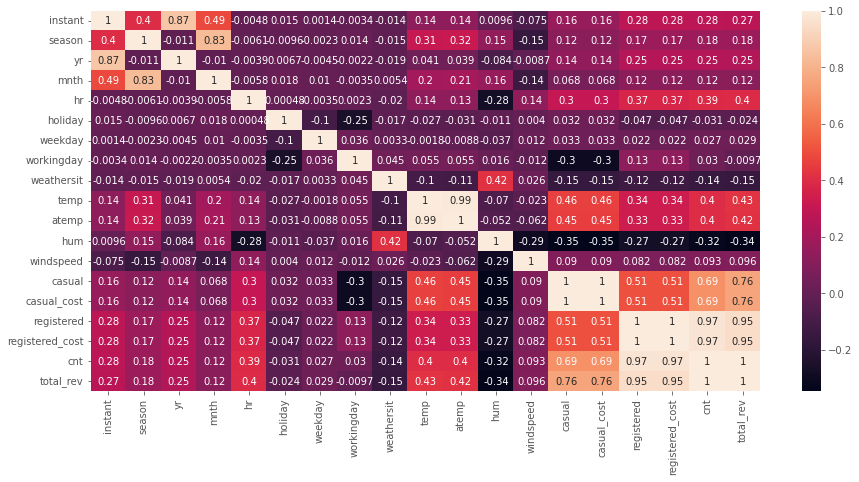

In [423]:
corr = data.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, annot_kws={'size':10})

In [424]:
dst = data.drop('dteday', axis=1)
for col in dst.columns:
  target_corr = data.corr()[col]

  fig = go.Figure([go.Bar(y = target_corr, x = target_corr.index, marker_color = 'red')])

  fig.update_layout(xaxis_title = col, yaxis_title = "Correlation",
      yaxis = dict(
          range=(-1, 1),
          showticklabels=True
      ))
  fig.show(renderer="colab")

In [425]:
target_corr = data.corr()['season']

fig = go.Figure([go.Bar(y = target_corr, x = target_corr.index, marker_color = 'red')])

fig.update_layout(xaxis_title = "Features", yaxis_title = "Correlation",
    yaxis = dict(
        range=(-1, 1),
        showticklabels=True
    ))
fig.show(renderer="colab")

In [426]:
for feature in  ['mnth', 'weekday', 'temp','atemp','season']:

    fig = go.Figure()
    fig.add_trace(go.Histogram(x = data[data.workingday == 1][feature], 
                 marker_color = 'green', opacity = 0.6, nbinsx = 10,  name = 'Yes', histnorm = 'probability'))

    fig.add_trace(go.Histogram(x = data[data.workingday == 0][feature],
                 marker_color = 'red', opacity = 0.6,nbinsx = 10, name = 'No', histnorm = 'probability'))

    fig.update_layout(
        legend = dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
        ),
        xaxis_title = feature,
        yaxis_title = "Share"
    )
    fig.show(renderer="colab")

In [427]:
correlation_matrix = data.corr()

fig = go.Figure(data=go.Heatmap(
                   z = correlation_matrix,
                   x = correlation_matrix.columns,
                   y = correlation_matrix.index,
                   hoverongaps = False,
                   xgap = 1,
                   ygap = 1,
                   zmin = -1,
                   zmax = 1,
    colorscale = 'rdbu_r'
))

fig.update_xaxes(side="top")
fig.update_layout(xaxis_title = "Features", yaxis_title = "Features")
fig.show(renderer="colab")

# Amended Data

## Added data to our dataset


We added the prices of renting our datas, for users who are registrered they will pay 10 euros to rent the data for 24 hours, as for casual users they will be paying 15 euros for 24 hours.

**casual_cost** = casual * 15

**registered_cost** = registered * 10

**total_rev** = casual_cost + registered_cost

In [428]:
a = data[['casual_cost','registered_cost','total_rev']]
a

,casual_cost,registered_cost,total_rev
0,45,130,175
1,120,320,440
2,75,270,345
3,45,100,145
4,0,10,10
...,...,...,...
17374,165,1080,1245
17375,120,810,930
17376,105,830,935
17377,195,480,675


## Total earnings per month

In [530]:
mnth_cnt = pd.DataFrame(data.groupby(['mnth'])['total_rev'].sum())

In [531]:
x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig = px.bar(mnth_cnt, x= x, y = mnth_cnt.total_rev, labels='seasons',title= 'Total Revenue Per Month')
fig.update_xaxes(title_text="Months")
fig.update_yaxes(title_text="Number of Revenue")
fig.show(renderer="colab")

## Total earnings per month based on registered users 

In [526]:
mnth_registered = pd.DataFrame(data.groupby(['mnth'])['registered_cost'].sum())

In [532]:
x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig = px.bar(mnth_registered, x= x, y = mnth_registered.registered_cost, labels='months',title= 'Total Revenue Per Month based on Registrered Users')
fig.update_xaxes(title_text="Months")
fig.update_yaxes(title_text="Number of Revenue")
fig.show(renderer="colab")

## Total earnings per month based on casual users 

In [528]:
mnth_casual = pd.DataFrame(data.groupby(['mnth'])['casual_cost'].sum())

In [533]:
x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig = px.bar(mnth_casual, x= x, y = mnth_casual.casual_cost, labels='months',title= 'Total Revenue Per Month based on Casual Users')
fig.update_xaxes(title_text="Months")
fig.update_yaxes(title_text="Number of Revenue")
fig.show(renderer="colab")

## Total Revenue based on Type of customer

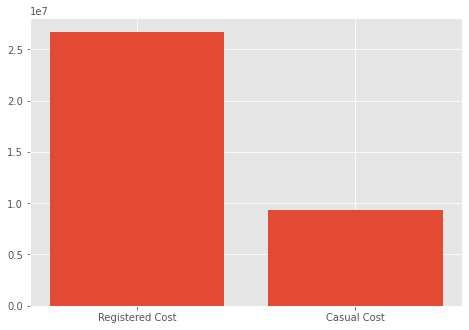

In [534]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cnt = [data.registered_cost.sum(), data.casual_cost.sum()]
lable = ['Registered Cost', 'Casual Cost']
ax.bar(lable,cnt)
plt.show()

# Expirement Tracking using ML Flow

In [469]:
data = pd.read_csv('/content/drive/MyDrive/hour_v2.csv')

In [7]:
data['dteday'] = pd.to_datetime(data['dteday'])

data['day'] = data['dteday'].map(lambda x:x.day)
data['month'] = data['dteday'].map(lambda x:x.month)
data['year'] = data['dteday'].map(lambda x:x.year)
data['hour'] = data['dteday'].map(lambda x:x.hour)

data.drop(labels=['dteday'], axis=1, inplace=True)

In [8]:
data

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,casual,casual_cost,registered,registered_cost,cnt,total_rev,day,month,year,hour
0,1,1,0,1,0,0,6,0,1,0.24,...,3,45,13,130,16,175,1,1,2011,0
1,2,1,0,1,1,0,6,0,1,0.22,...,8,120,32,320,40,440,1,1,2011,0
2,3,1,0,1,2,0,6,0,1,0.22,...,5,75,27,270,32,345,1,1,2011,0
3,4,1,0,1,3,0,6,0,1,0.24,...,3,45,10,100,13,145,1,1,2011,0
4,5,1,0,1,4,0,6,0,1,0.24,...,0,0,1,10,1,10,1,1,2011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,19,0,1,1,2,0.26,...,11,165,108,1080,119,1245,31,12,2012,0
17375,17376,1,1,12,20,0,1,1,2,0.26,...,8,120,81,810,89,930,31,12,2012,0
17376,17377,1,1,12,21,0,1,1,1,0.26,...,7,105,83,830,90,935,31,12,2012,0
17377,17378,1,1,12,22,0,1,1,1,0.26,...,13,195,48,480,61,675,31,12,2012,0


In [9]:
data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

data.month.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)

In [10]:
data.drop(['casual','registered', 'year', 'hour', 'day', 'workingday', 'holiday','instant','season','month'],axis=1,inplace=True)

In [11]:
data.sample(3)

,yr,mnth,hr,weekday,weathersit,temp,atemp,hum,windspeed,casual_cost,registered_cost,cnt,total_rev
11836,1,5,9,0,1,0.60,0.6212,0.56,0.1343,1185,1430,222,2615
11205,1,4,2,2,1,0.56,0.5303,0.83,0.1045,15,30,4,45
4212,0,6,10,3,1,0.74,0.6667,0.42,0.2836,465,950,126,1415


In [12]:
data.sample(3)

,yr,mnth,hr,weekday,weathersit,temp,atemp,hum,windspeed,casual_cost,registered_cost,cnt,total_rev
10030,1,2,23,1,1,0.42,0.4242,0.50,0.1642,90,500,56,590
7692,0,11,3,2,3,0.38,0.3939,1.00,0.1045,15,20,3,35
3795,0,6,1,0,1,0.64,0.5758,0.83,0.1045,285,740,93,1025


In [13]:
data

,yr,mnth,hr,weekday,weathersit,temp,atemp,hum,windspeed,casual_cost,registered_cost,cnt,total_rev
0,0,1,0,6,1,0.24,0.2879,0.81,0.0000,45,130,16,175
1,0,1,1,6,1,0.22,0.2727,0.80,0.0000,120,320,40,440
2,0,1,2,6,1,0.22,0.2727,0.80,0.0000,75,270,32,345
3,0,1,3,6,1,0.24,0.2879,0.75,0.0000,45,100,13,145
4,0,1,4,6,1,0.24,0.2879,0.75,0.0000,0,10,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,1,2,0.26,0.2576,0.60,0.1642,165,1080,119,1245
17375,1,12,20,1,2,0.26,0.2576,0.60,0.1642,120,810,89,930
17376,1,12,21,1,1,0.26,0.2576,0.60,0.1642,105,830,90,935
17377,1,12,22,1,1,0.26,0.2727,0.56,0.1343,195,480,61,675


In [14]:
min_max=MinMaxScaler()

scaled=pd.DataFrame(min_max.fit_transform(data), columns=data.columns)

scaled.head()

,yr,mnth,hr,weekday,weathersit,temp,atemp,hum,windspeed,casual_cost,registered_cost,cnt,total_rev
0,0.0,0.0,0.000000,1.0,0.0,0.224490,0.2879,0.81,0.0,0.008174,0.014673,0.015369,0.015165
1,0.0,0.0,0.043478,1.0,0.0,0.204082,0.2727,0.80,0.0,0.021798,0.036117,0.039959,0.039522
2,0.0,0.0,0.086957,1.0,0.0,0.204082,0.2727,0.80,0.0,0.013624,0.030474,0.031762,0.030790
3,0.0,0.0,0.130435,1.0,0.0,0.224490,0.2879,0.75,0.0,0.008174,0.011287,0.012295,0.012408
4,0.0,0.0,0.173913,1.0,0.0,0.224490,0.2879,0.75,0.0,0.000000,0.001129,0.000000,0.000000


In [15]:
X = scaled.drop(labels=['cnt'], axis=1)
y = scaled['cnt']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Random Forest Regressor

In [16]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

mean_squared_error(y_test, y_pred, squared=False)

0.0015133301024265323

## Cross Validation

In [17]:
cv_scores = cross_val_score(rfr, X_train, y_train, cv=20)

print(cv_scores)
print('Accuracy =',cv_scores.mean())

[0.99993731 0.99992007 0.99993972 0.99993353 0.99993136 0.99996485
 0.99994742 0.99994051 0.99995764 0.99989903 0.9997245  0.99995184
 0.99993649 0.99990401 0.99993822 0.99995755 0.99993784 0.99995447
 0.99996192 0.99995113]
Accuracy = 0.9999294702429273


## Mlflow tracker

In [59]:
!pip install mlflow
!databricks configure --host ahlam.yousuf@phaze.rohttps://community.cloud.databricks.com/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Username: ahlam.yousuf@phaze.ro
Password: 
Repeat for confirmation: 


In [66]:
mlflow.set_tracking_uri("databricks")
mlflow.set_experiment("/Shared/bike_sharing")

<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/1813266453505913', experiment_id='1813266453505913', lifecycle_stage='active', name='/Shared/bike_sharing', tags={'mlflow.experiment.sourceName': '/Shared/bike_sharing',
 'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': 'ahlam.yousuf@phaze.ro',
 'mlflow.ownerId': '306037419422296'}>

In [67]:
with mlflow.start_run():
    mlflow.set_tag("workspace", "project")
    
    alpha = 0.5
    mlflow.log_param("alpha", alpha)
    
    lr = RandomForestRegressor() 
    mlflow.sklearn.autolog()
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    
    mlflow.log_metric("rmse", rmse)

2022/07/28 23:31:32 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: dump_all() got an unexpected keyword argument 'sort_keys'


## Hyperparameters Optimization

In [68]:
train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

In [69]:
def objective(params):
    with mlflow.start_run():
        num_boost_round = 500
        early_stopping_rounds = 50
        
        mlflow.log_params(params)
        mlflow.log_param('num_boost_round', num_boost_round)
        mlflow.log_param('early_stopping_rounds', early_stopping_rounds)
        mlflow.set_tag('model', 'xgboost')

        booster = xgb.train(
            params = params,
            dtrain = train,
            evals = [(test, "test")],
            num_boost_round = num_boost_round,
            early_stopping_rounds = early_stopping_rounds
        )
        
        y_pred = booster.predict(test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mlflow.log_metric('rmse', rmse)
        mlflow.end_run()
        return {'loss': rmse, 'status': STATUS_OK}


In [70]:
grid_search = {
    'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child': hp.loguniform('min_child', -1, 3),
    'seed': 111,
    'objective': 'reg:linear'
}

In [71]:
best_model = fmin(
    fn=objective,
    space=grid_search,
    algo=tpe.suggest,
    max_evals=30,
    trials=Trials()
)

Streaming output truncated to the last 5000 lines.
[57]	test-rmse:0.001975

[58]	test-rmse:0.001975

[59]	test-rmse:0.001975

[60]	test-rmse:0.001975

[61]	test-rmse:0.001975

[62]	test-rmse:0.001975

[63]	test-rmse:0.001975

[64]	test-rmse:0.001975

[65]	test-rmse:0.001975

[66]	test-rmse:0.001975

[67]	test-rmse:0.001975

[68]	test-rmse:0.001975

[69]	test-rmse:0.001975

[70]	test-rmse:0.001975

[71]	test-rmse:0.001975

[72]	test-rmse:0.001975

[73]	test-rmse:0.001975

[74]	test-rmse:0.001975

[75]	test-rmse:0.001975

[76]	test-rmse:0.001975

[77]	test-rmse:0.001975

[78]	test-rmse:0.001975

[79]	test-rmse:0.001975

[80]	test-rmse:0.001975

[81]	test-rmse:0.001975

[82]	test-rmse:0.001975

[83]	test-rmse:0.001975

[84]	test-rmse:0.001975

[85]	test-rmse:0.001975

[86]	test-rmse:0.001975

[87]	test-rmse:0.001975

Stopping. Best iteration:
[37]	test-rmse:0.001975


[23:31:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squareder